## 决策树特点：监督学习 

假设有M个样本 {(X(1),y(1)),(X(2),y(2)),⋯,(X(m),y(m))}

X(i)={x(i)1,x(i)2,⋯,x(i)m}X(i)={x1(i),x2(i),⋯,xm(i)}称为第ii个样本的特征，
y(1)称为第ii个样本的标签，样本标签可以为离散值，如分类问题；也可以为连续值，如回归问题



### 学习目标 
-目标，损失函数最小的优化，梯度下降，随机梯度下降
训练决策树模型时，我们从根节点出发，常用的度量I包括基尼指数(Gini index, )、熵(Entropy, )和分类错误(classification error, )。然后迭代此过程。

有三种情形会导致递归返回:

（1）当前节点包含的样本全属于同一类别，无需划分；

（2）当前属性集为空，或是所有样本在所有属性上取值相同，无法划分；

（3）当前节点包含的样本集合为空，不能划分


  学生分类case：
  1. 分数小于70为【不是好学生】：分错1个

  2. 出勤率大于70为【好学生】：分错3个

  3. 问题回答次数大于9为【好学生】：分错2个

  4. 作业提交率大于80%为【好学生】：分错2个

最后发现  分数小于70为【不是好学生】这条分错最少，也就是熵最大

针对每一个选择，与分裂前的分类错误率比较，留下那个提高最大的选择，即熵增益最大的选择

p(i|t) 指的是在节点t中属于类别c的样本占比。所以如果某个节点中所有样本都属于同一个类，则熵为0，如果样本的类别时均匀分布，则熵最大

熵 Entropy(S) = Sum(-pi*Log2(pi))
  

基于基尼指数，对应CART算法。选择基尼指数小的 基尼系数可以被理解为最小化误分类的概率：


Gini(s)  =  Entropy(s) - {Sv/S}* Entropy(Sv) 

另一种常用的度量是分类误差：

这个度量更建议在剪枝时使用，而不是在构建决策树时使用

我们调用sklearn，使用熵作为度量，训练一颗最大深度为3的决策树



剪枝处理：防止过拟合

### scikit-learn API 实现分类分回归树应用
 train_tset_split 分割 Iris 训练集和测试集
 
sklearn中的StandardScaler来对特征进行标准化

StandardScaler对训练集中每一维度特征计算出(样本平均值)和(标准差)，然后调用transform方法对数据集进行标准化

DecisionTreeClassifier 能够对数据进行多分类的类。

和其他分类器一样，DecisionTreeClassifier 有两个向量输入：X，稀疏或密集，大小为[n_sample,n_fearure],存放训练样本； Y，值为整型，

大小为[n_sample],存放训练样本的分类标签：

以下使用Sklearn Tree 类 构建一个决策树分类器，对一个简单数据进行拟合：

In [15]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

拟合后模型的predict对新数据进行预测，
predict_proba 可以预测，即某个叶子中，该分类样本的占比。
 

In [16]:
print(clf.predict([[2., 2.]]))
print(clf.predict_proba([[2., 2.]]))


[1]
[[0. 1.]]


### DecisionTreeClassifier 能同时应用于二分类（标签为[-1,1]）和多分类(标签为[0,1,K-1])

用数据集 lris ,可以构造下面的树：

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
iris = load_iris()          # 载入数据
clf = tree.DecisionTreeClassifier()   # 使用sklearn决策树分类器
clf = clf.fit(iris.data, iris.target)  # 拟合、训练模型

In [4]:
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    

In [5]:
!ls iris.dot 

iris.dot


In [6]:
# import os
# os.unlink('iris.dot')  # 删除文件

In [19]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
# graph.write_pdf("iris.pdf")

True

In [26]:
from IPython.display import Image
# graph.write_png('example.png') 
Image(graph.create_png()) 
# Image('example.png')
# !ls iris.pd
# !rm('example.png')

/bin/sh: -c: line 0: syntax error near unexpected token `'example.png''
/bin/sh: -c: line 0: `rm('example.png')'



现在我们可以查看决策树在构建树时的过程：根节点105个样本，使用 petal_width <=0.75分割为两个子节点。经过第一个分割，我们可以发现左节点中样本都是同一类型，所以停止此节点的分割，右节点继续分割，注意一点，在构建决策树时两个特征各使用了两次。

## Regression  DecisionTreeRegressor
和分类一样，拟合方法也需要两个向量参数，X 和 y，不同的是这里y是浮点型数据，而不是整型

In [9]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])


array([0.5])

## 随机森林 
通过自助法(bootstrap)构建大小为n的一个训练集，即重复抽样选择n个训练样例

#### sklearn.ensemble，集成方法模块

sklearn.ensemble提供了准确性更加好的集成方法，里面包含了主要的RandomForestClassifier(随机森林)方法

对于刚才新得到的训练集，构建一棵决策树。在每个节点执行以下操作：

    通过不重复抽样选择d个特征
    利用上面的d个特征，选择某种度量分割节点
    
重复步骤1和2，k次
对于每一个测试样例，对k颗决策树的预测结果进行投票。票数最多的结果就是随机森林的预测结果。

1、优点是受超参数的影响波动不大

2、树的数目(k) 越大，随机森林的性能越好，计算成本会越高

3、样本大小n能够控制bias-variance平衡，如果n很大，会减小了随机性，易过拟合，太小每课树性能太差



## class sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None)
x =   """
  :param n_estimators：integer，optional（default = 10） 森林里的树木数量。
 
  :param criteria：string，可选（default =“gini”）分割特征的测量方法
 
  :param max_depth：integer或None，可选（默认=无）树的最大深度
 
  :param bootstrap：boolean，optional（default = True）是否在构建树时使用自举样本。
 
  """
方法

fit（X，y [，sample_weight]） 从训练集（X，Y）构建一棵树林。

predict（X） 预测X的类

score（X，y [，sample_weight]） 返回给定测试数据和标签的平均精度。

decision_path（X） 返回森林中的决策路径




## Adaboost
Boosting方法的代表
整体思路：先从初始训练集训练出一个基学习器，根据基学习器的表现对训练样本分布进行调整，提高之前被分错的样本的权重，然后基于调整后的样本分布继续训练出下一个学习器，如此重复，直到学习器的数目达到设定值。最终将这T个学习器进行加权结合。

最终得到的组合f(x),

值的符号代表所属的类别，

绝对值的大小代表分类的确信度。

模型为加法模型，损失函数为指数函数，学习算法为前向分步算法的二类分类方法。

前向分步算法思想：因为学习的是加法模型，所以从前向后，一次只学习一个模型及其系数，逐步逼近




In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)
#讲两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))
## 我们通过可视化看看我们的分类数据，它有两个特征，两个输出类别，用颜色区别。1

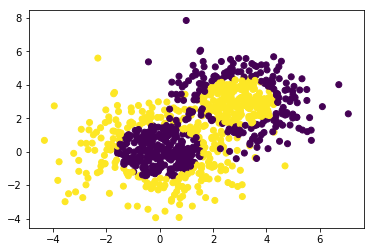

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

#### 可以看到数据有些混杂，我们现在用基于决策树的Adaboost来做分类拟合。


In [21]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

这里我们选择了SAMME算法，最多200个弱分类器，步长0.8，在实际运用中你可能需要通过交叉验证调参而选择最好的参数。拟合完了后，我们用网格图来看看它拟合的区域。

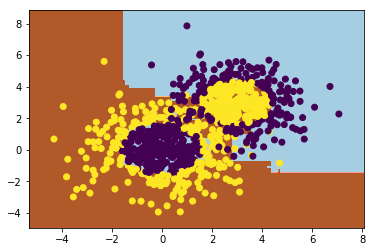

In [22]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

#### 检查拟合分数
　　　　也就是说拟合训练集数据的分数还不错。当然分数高并不一定好，因为可能过拟合。

　　　　现在我们将最大弱分离器个数从200增加到300。再来看看拟合分

In [23]:
print("Score:", bdt.score(X,y))

Score: 0.9133333333333333


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


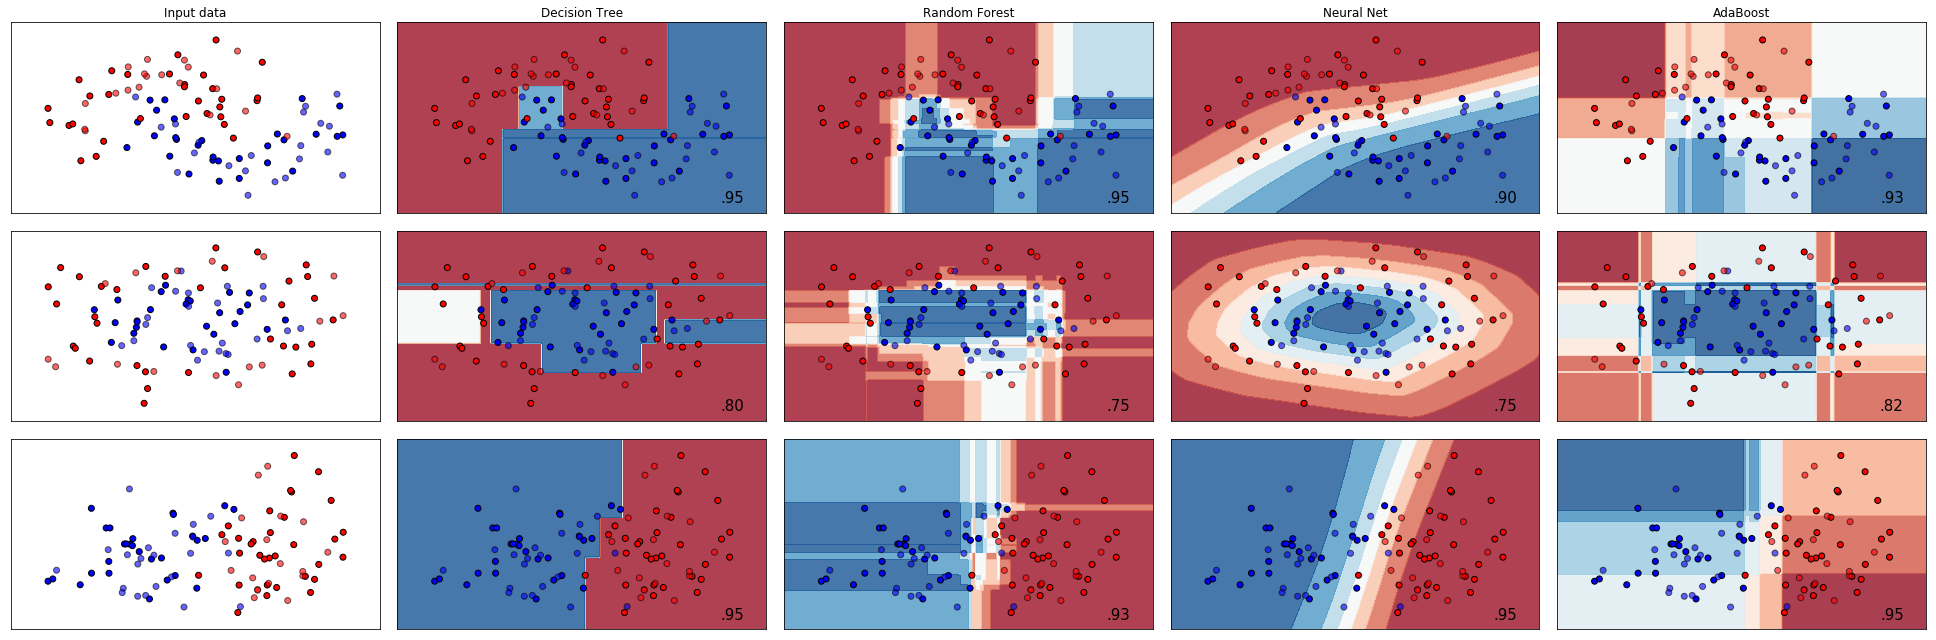

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh
names =  ["Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [39]:
# !python 组合树的决策面.py

In [88]:
from pandas import Series
idx = iris.data[:, 1:3].shape[0]
print(idx)
idx =  np.arange(idx)
print(idx[1:10])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
print(idx[1:20])
iris.feature_names
iris.data[:, 1:3][1,]

X = iris.data[:, 1:3]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
xx.ravel()
print(iris.target_names)
Series(iris.target).value_counts()

150
[1 2 3 4 5 6 7 8 9]
[ 64  21 101 112  33 135 123  46  90 138 133  87  44 114  30 127 104  91
   8]
['setosa' 'versicolor' 'virginica']


2    50
1    50
0    50
dtype: int64

## 探索 不同的特征组合，用不同的分类器得到的分类决策 面试什么样的


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

plt.rcParams['figure.figsize'] = (14.0, 12.0) # 设置figure_size尺寸
# Load data
iris = load_iris()
plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None), RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators), AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.9266666666666666
AdaBoost with 30 estimators with features [0, 1] has a score of 0.84
---------
DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.9933333333333333
---------
DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.9933333333333333
---------


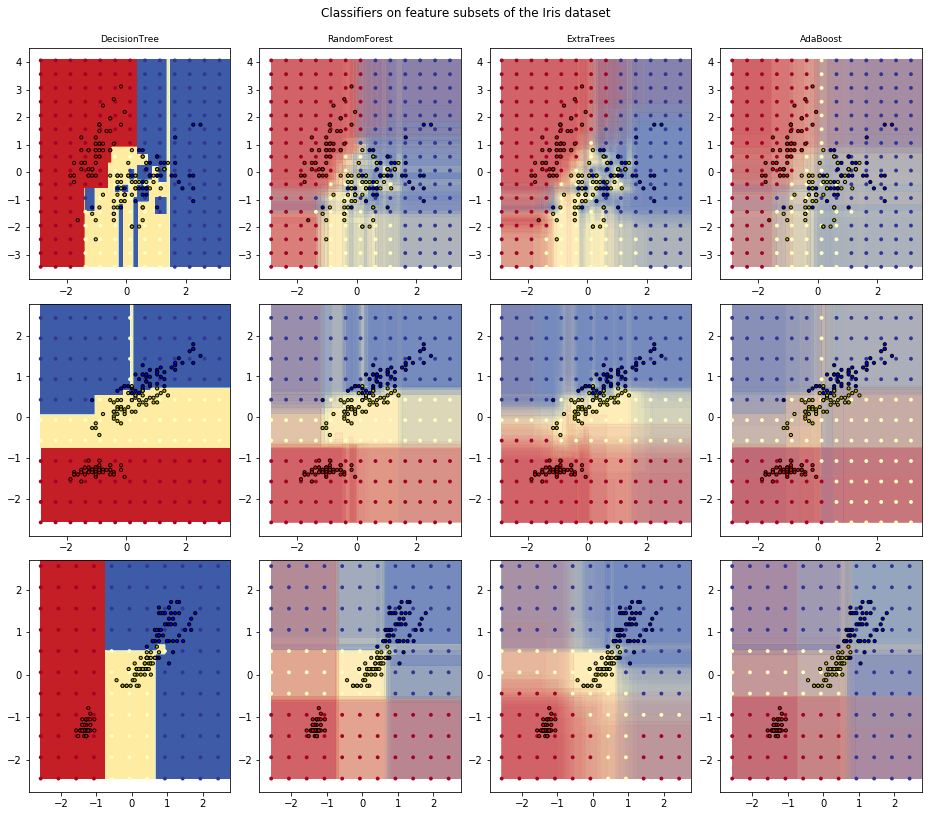

In [94]:
# 探索 不同的特征组合，用不同的分类器得到的分类决策 面试什么样的
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X,y = iris.data[:, pair], iris.target
        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title 
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=10)
        plot_idx += 1  # move on to the next plot in sequence
    print('---------')
plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
# plt.tight_layout()
plt.tight_layout(h_pad=0.4, w_pad=0.4, pad=4.5)
plt.show()

##  1. GBDT概述
　GBDT也是集成学习Boosting家族的成员，但是却和传统的Adaboost有很大的不同。Adaboost是利用前一轮迭代弱学习器的误差率来更新训练集的权重，这样一轮轮的迭代下去。GBDT也是迭代，使用了前向分布算法，但是弱学习器限定了只能使用CART回归树模型，同时迭代思路和Adaboost也有所不同。

　　　　在GBDT的迭代中，假设我们前一轮迭代得到的强学习器是ft-1(x)损失函数是L(y,ft-1(x)) 我们本轮迭代的目标是找到一个CART回归树模型的弱学习器ht(x)，让本轮的损失L(t,ft-1(x)+ht(x))最小。也就是说，本轮迭代找到决策树，要让样本的损失尽量变得更小。

 

　　　　GBDT的思想可以用一个通俗的例子解释，假如有个人30岁，我们首先用20岁去拟合，发现损失有10岁，这时我们用6岁去拟合剩下的损失，发现差距还有4岁，第三轮我们用3岁拟合剩下的差距，差距就只有一岁了。如果我们的迭代轮数还没有完，可以继续迭代下面，每一轮迭代，拟合的岁数误差都会减小。

 
 在sacikit-learn中，GradientBoostingClassifier为GBDT的分类类， 而GradientBoostingRegressor为GBDT的回归类。两者的参数类型完全相同，当然有些参数比如损失函数loss的可选择项并不相同



## 2. GBDT的负梯度拟合
Freidman提出了用损失函数的负梯度来拟合本轮损失的近似值，进而拟合一个CART回归树。第t轮的第i个样本的损失函数的负梯度表示为
  
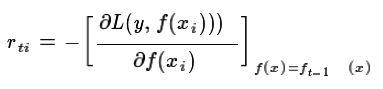
　　　　利用(xi,rti)(i=1,2,...m),我们可以拟合一颗CART回归树，得到
    了第t颗回归树，其对应的叶节点区域Rtj,j=1,2,...,J。其中J为叶子节点的个数。

　　　　针对每一个叶子节点里的样本，我们求出使损失函数最小，也就是拟合叶子节点最好的的输出值ctj如下：


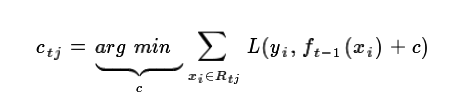
　　　　这样我们就得到了本轮的决策树拟合函数如下：

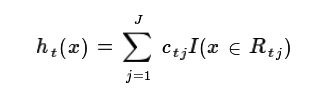
从而本轮最终得到的强学习器的表达式如下：



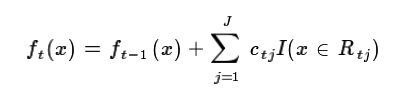
　通过损失函数的负梯度来拟合，我们找到了一种通用的拟合损失误差的办法，这样无轮是分类问题还是回归问题，我们通过其损失函数的负梯度的拟合，就可以用GBDT来解决我们的分类回归问题。区别仅仅在于损失函数不同导致的负梯度不同而已。


### GBDT类库boosting框架参数

GradientBoostingClassifier和GradientBoostingRegressor的参数绝大部分相同

　1) n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是100。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。

　2) learning_rate: 即每个弱学习器的权重缩减系数νν，也称作步长，在原理篇的正则化章节我们也讲到了，加上了正则化项，我们的强学习器的迭代公式为
 
 fk(x)=fk−1(x)+νhk(x)fk(x)=fk−1(x)+νhk(x)
 
 ν的取值范围为0<ν≤10<ν≤1。对于同样的训练集拟合效果，较小的ν意味着我们需要更多的弱学习器的迭代次数。通常我们用步长和迭代最大次数一起来决定算法的拟合效果。所以这两个参数n_estimators和learning_rate要一起调参。一般来说，可以从一个小一点的ν开始调参，默认是1。

　3) subsample: 正则化子采样，取值为(0,1]。注意这里的子采样和随机森林不一样，随机森林使用的是放回抽样，而这里是不放回抽样。如果取值为1，则全部样本都使用，等于没有使用子采样。如果取值小于1，则只有一部分样本会去做GBDT的决策树拟合。选择小于1的比例可以减少方差，即防止过拟合，但是会增加样本拟合的偏差，因此取值不能太低。推荐在[0.5, 0.8]之间，默认是1.0，即不使用子采样。

　4) init: 即我们的初始化的时候的弱学习器，拟合对应原理篇里面的f0(x)，如果不输入，则用训练集样本来做样本集的初始化分类回归预测。否则用init参数提供的学习器做初始化分类回归预测。一般用在我们对数据有先验知识，或者之前做过一些拟合的时候，如果没有的话就不用管这个参数了。

　5) loss: 即我们GBDT算法中的损失函数。分类模型和回归模型的损失函数是不一样的。

　　　　　　对于分类模型，有对数似然损失函数"deviance"和指数损失函数"exponential"两者输入选择。默认是对数似然损失函数"deviance"。在原理篇中对这些分类损失函数有详细的介绍。一般来说，推荐使用默认的"deviance"。它对二元分离和多元分类各自都有比较好的优化。而指数损失函数等于把我们带到了Adaboost算法。

　　　　　　对于回归模型，有均方差"ls", 绝对损失"lad", Huber损失"huber"和分位数损失“quantile”。默认是均方差"ls"。一般来说，如果数据的噪音点不多，用默认的均方差"ls"比较好。如果是噪音点较多，则推荐用抗噪音的损失函数"huber"。而如果我们需要对训练集进行分段预测的时候，则采用“quantile”。

　　6) alpha：这个参数只有GradientBoostingRegressor有，当我们使用Huber损失"huber"和分位数损失“quantile”时，需要指定分位数的值。默认是0.9，如果噪音点较多，可以适当降低这个分位数的值。

### GBDT 调参实例



In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv('train_modified.csv')
target='Disbursed'
IDcol = 'ID'
train['Disbursed'].value_counts()

0    19680
1      320
Name: Disbursed, dtype: int64

In [4]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [7]:
x_columns = [x for x in train.columns if x not in [target, IDcol]]
X = train[x_columns]
y = train['Disbursed']

In [ ]:
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X,y)
y_pred = gbm0.predict(X)
y_predprob = gbm0.predict_proba(X)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y.values, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

### 调参：步长(learning rate)和迭代次数(n_estimators)

一般来说,开始选择一个较小的步长来网格搜索最好的迭代次数。

这里，我们将步长初始值设置为0.1。对于迭代次数进行网格搜索如下

In [11]:
param_test1 = {'n_estimators':list(range(20,81,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.81285, std: 0.01967, params: {'n_estimators': 20},
  mean: 0.81438, std: 0.01947, params: {'n_estimators': 30},
  mean: 0.81404, std: 0.01970, params: {'n_estimators': 40},
  mean: 0.81593, std: 0.01868, params: {'n_estimators': 50},
  mean: 0.81927, std: 0.01596, params: {'n_estimators': 60},
  mean: 0.81722, std: 0.01750, params: {'n_estimators': 70},
  mean: 0.81485, std: 0.01732, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.8192660696138212)

### 调参：决策树最大深度
找到了一个合适的迭代次数，现在我们开始对决策树进行调参。
首先我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

In [12]:
param_test2 = {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(100,801,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.81199, std: 0.02073, params: {'max_depth': 3, 'min_samples_split': 100},
  mean: 0.81267, std: 0.01985, params: {'max_depth': 3, 'min_samples_split': 300},
  mean: 0.81238, std: 0.01937, params: {'max_depth': 3, 'min_samples_split': 500},
  mean: 0.80925, std: 0.02051, params: {'max_depth': 3, 'min_samples_split': 700},
  mean: 0.81846, std: 0.01843, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: 0.81630, std: 0.01810, params: {'max_depth': 5, 'min_samples_split': 300},
  mean: 0.81315, std: 0.01898, params: {'max_depth': 5, 'min_samples_split': 500},
  mean: 0.81262, std: 0.02090, params: {'max_depth': 5, 'min_samples_split': 700},
  mean: 0.81807, std: 0.02004, params: {'max_depth': 7, 'min_samples_split': 100},
  mean: 0.82137, std: 0.01733, params: {'max_depth': 7, 'min_samples_split': 300},
  mean: 0.81681, std: 0.01786, params: {'max_depth': 7, 'min_samples_split': 500},
  mean: 0.81383, std: 0.02327, params: {'max_depth': 7, 'min_samples_split': 700},
  me

### 深度参数，最小划分调参结论：
可见最好的最大树深度是7，内部节点再划分所需最小样本数是300
### 调参：内部节点再划分min_samples_split 最小样本数min_samples_split

由于决策树深度7是一个比较合理的值，我们把它定下来，对于内部节点再划分所需最小样本数min_samples_split，

我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。

下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数

In [14]:
param_test3 = {'min_samples_split':list(range(800,1900,200)), 'min_samples_leaf':list(range(60,101,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.81828, std: 0.02251, params: {'min_samples_leaf': 60, 'min_samples_split': 800},
  mean: 0.81731, std: 0.02344, params: {'min_samples_leaf': 60, 'min_samples_split': 1000},
  mean: 0.82220, std: 0.02250, params: {'min_samples_leaf': 60, 'min_samples_split': 1200},
  mean: 0.81447, std: 0.02125, params: {'min_samples_leaf': 60, 'min_samples_split': 1400},
  mean: 0.81495, std: 0.01626, params: {'min_samples_leaf': 60, 'min_samples_split': 1600},
  mean: 0.81528, std: 0.02140, params: {'min_samples_leaf': 60, 'min_samples_split': 1800},
  mean: 0.81590, std: 0.02517, params: {'min_samples_leaf': 70, 'min_samples_split': 800},
  mean: 0.81573, std: 0.02207, params: {'min_samples_leaf': 70, 'min_samples_split': 1000},
  mean: 0.82021, std: 0.02521, params: {'min_samples_leaf': 70, 'min_samples_split': 1200},
  mean: 0.81512, std: 0.01995, params: {'min_samples_leaf': 70, 'min_samples_split': 1400},
  mean: 0.81395, std: 0.02081, params: {'min_samples_leaf': 70, 'min_samples_split

### 调参结论：
我们调了这么多参数了，终于可以都放到GBDT类里面去看看效果了。现在我们用新参数拟合数据


In [15]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_leaf =60, 
               min_samples_split =1200, max_features='sqrt', subsample=0.8, random_state=10)
gbm1.fit(X,y)
y_pred = gbm1.predict(X)
y_predprob = gbm1.predict_proba(X)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y.values, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

Accuracy : 0.984
AUC Score (Train): 0.908099


### 调参结论：精度下降
对比我们最开始完全不调参的拟合效果，可见精确度稍有下降，主要原理是我们使用了0.8的子采样，20%的数据没有参与拟合。

现在我们再对最大特征数max_features进行网格搜索。
### 对max_features 再调参

In [17]:
param_test4 = {'max_features':list(range(7,20,2))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_leaf =60, 
               min_samples_split =1200, subsample=0.8, random_state=10), 
                       param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_


([mean: 0.82220, std: 0.02250, params: {'max_features': 7},
  mean: 0.82241, std: 0.02421, params: {'max_features': 9},
  mean: 0.82108, std: 0.02302, params: {'max_features': 11},
  mean: 0.82064, std: 0.01900, params: {'max_features': 13},
  mean: 0.82198, std: 0.01514, params: {'max_features': 15},
  mean: 0.81355, std: 0.02053, params: {'max_features': 17},
  mean: 0.81877, std: 0.01863, params: {'max_features': 19}],
 {'max_features': 9},
 0.822412506351626)

### 调参：子采样的比例进行网格搜索


In [20]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_leaf =60, 
               min_samples_split =1200, max_features=9, random_state=10), 
                       param_grid = param_test5, scoring='roc_auc',iid=False, cv=5)
gsearch5.fit(X,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.81828, std: 0.02392, params: {'subsample': 0.6},
  mean: 0.82344, std: 0.02708, params: {'subsample': 0.7},
  mean: 0.81673, std: 0.02196, params: {'subsample': 0.75},
  mean: 0.82241, std: 0.02421, params: {'subsample': 0.8},
  mean: 0.82285, std: 0.02446, params: {'subsample': 0.85},
  mean: 0.81738, std: 0.02236, params: {'subsample': 0.9}],
 {'subsample': 0.7},
 0.8234378969766262)

### 调参最终结论
已经调制了所有参数，现在我们尝试用最优参数训练模型数据，并查看结果
现在我们基本已经得到我们所有调优的参数结果了。这时我们可以减半步长，最大迭代次数加倍来增加我们模型的泛化能力。再次拟合我们的模型：

In [21]:
gbm2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=7, min_samples_leaf =60, 
               min_samples_split =1200, max_features=9, subsample=0.7, random_state=10)
gbm2.fit(X,y)
y_pred = gbm2.predict(X)
y_predprob = gbm2.predict_proba(X)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y.values, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

Accuracy : 0.984
AUC Score (Train): 0.905324


## 调参结论：Auc下降

可以看到AUC分数比起之前的版本稍有下降，这个原因是我们为了增加模型泛化能力，为防止过拟合而减半步长，
最大迭代次数加倍，同时减小了子采样的比例，从而减少了训练集的拟合程度。

### 调参：
下面我们继续将步长缩小5倍，最大迭代次数增加5倍，继续拟合我们的模型

In [23]:
gbm3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=7, min_samples_leaf =60, 
               min_samples_split =1200, max_features=9, subsample=0.7, random_state=10)
gbm3.fit(X,y)
y_pred = gbm3.predict(X)
y_predprob = gbm3.predict_proba(X)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y.values, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

Accuracy : 0.984
AUC Score (Train): 0.908581
